# Jupiter Notebook 
## for training of simple classifiers and interpretability methods

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# load dataset into a pandas DataFrame
import pandas as pd
df = pd.read_csv("depression_detection_features_withID.csv")
df.head()

,ID,depression_label,frequency_of_speech,mean_length_of_speech,mean_word_length,flair_sentiment,flair_score,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,300,0,77,4.181818,4.068323,0,0.898453,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,301,0,72,19.430556,3.961401,1,0.830033,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,302,0,99,6.151515,4.096880,1,0.613937,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,303,0,94,20.382979,3.914927,1,0.989942,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,304,0,80,12.400000,4.021169,0,0.990270,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611


In [3]:
df.columns

Index(['ID', 'depression_label', 'frequency_of_speech',
       'mean_length_of_speech', 'mean_word_length', 'flair_sentiment',
       'flair_score', 'average_frequency_nouns', 'average_frequency_verbs',
       'average_frequency_adjectives', 'average_frequency_adverbs',
       'average_frequency_firstperson', 'speech_speed', 'unique_word_count',
       'stop_word_frequency'],
      dtype='object')

In [4]:
# Check the total size of the dataset
df.shape

(219, 15)

In [5]:
# Check variable types
df.dtypes

ID                                 int64
depression_label                   int64
frequency_of_speech                int64
mean_length_of_speech            float64
mean_word_length                 float64
flair_sentiment                    int64
flair_score                      float64
average_frequency_nouns          float64
average_frequency_verbs          float64
average_frequency_adjectives     float64
average_frequency_adverbs        float64
average_frequency_firstperson    float64
speech_speed                     float64
unique_word_count                  int64
stop_word_frequency                int64
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

ID                               0
depression_label                 0
frequency_of_speech              0
mean_length_of_speech            0
mean_word_length                 0
flair_sentiment                  0
flair_score                      0
average_frequency_nouns          0
average_frequency_verbs          0
average_frequency_adjectives     0
average_frequency_adverbs        0
average_frequency_firstperson    0
speech_speed                     0
unique_word_count                0
stop_word_frequency              0
dtype: int64

# Checking for correlations

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

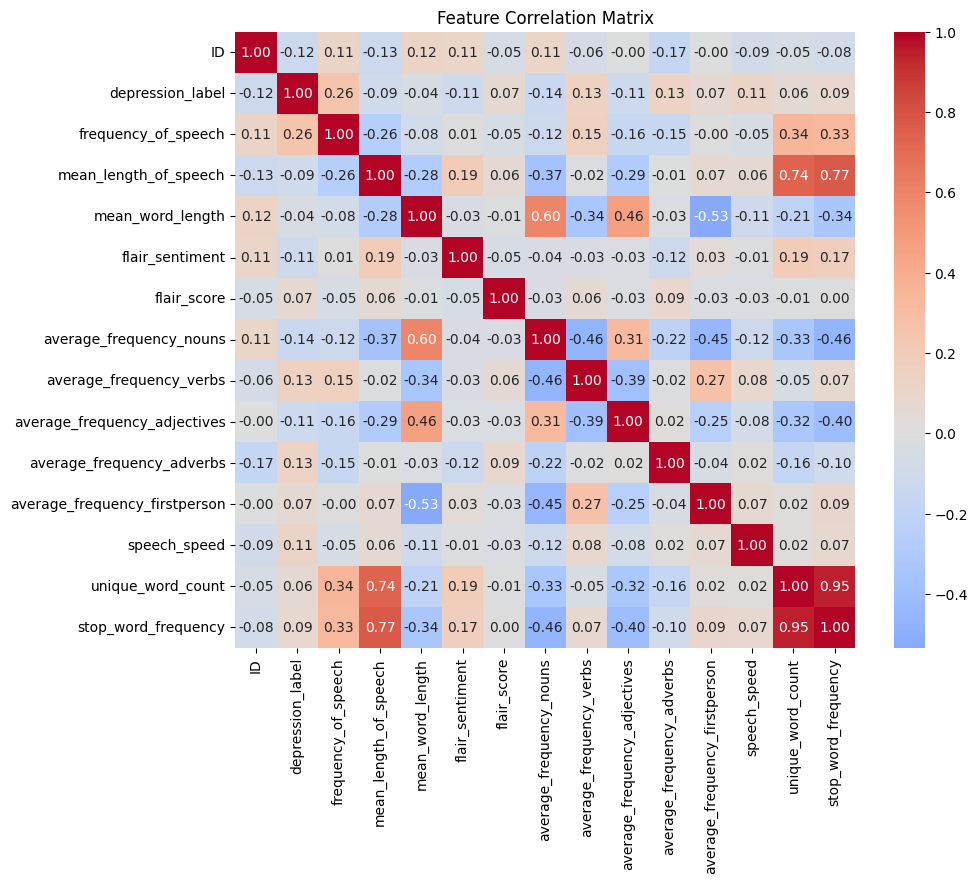

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Preparing the data for ML classification

Input features (all or a selection)
- frequency_of_speech
- mean_length_of_speech
- mean_word_length
- flair_sentiment
- flair_score
- average_frequency_nouns
- average_frequency_verbs
- average_frequency_adjectives
- average_frequency_adverbs
- average_frequency_firstperson
- speech_speed
- unique_word_count
- stop_word_frequency

Binary target class (could be changed, having different categories for depresion)
- depression_label (0 for no depression, 1 for depression)

In [9]:
import numpy as np
import random
# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [10]:
# Convert DataFrame to numpy array
numpy_array = df.values
print(numpy_array)

[[3.00000000e+02 0.00000000e+00 7.70000000e+01 ... 4.23795736e-01
  1.73000000e+02 1.74000000e+02]
 [3.01000000e+02 0.00000000e+00 7.20000000e+01 ... 1.05848528e+00
  3.64000000e+02 9.07000000e+02]
 [3.02000000e+02 0.00000000e+00 9.90000000e+01 ... 6.25064149e-01
  2.86000000e+02 3.30000000e+02]
 ...
 [7.03000000e+02 0.00000000e+00 8.30000000e+01 ... 2.70615563e+00
  2.15000000e+02 2.60000000e+02]
 [7.07000000e+02 0.00000000e+00 9.70000000e+01 ... 2.66859345e+00
  3.20000000e+02 4.97000000e+02]
 [7.13000000e+02 0.00000000e+00 1.11000000e+02 ... 6.65879807e-01
  2.70000000e+02 4.22000000e+02]]


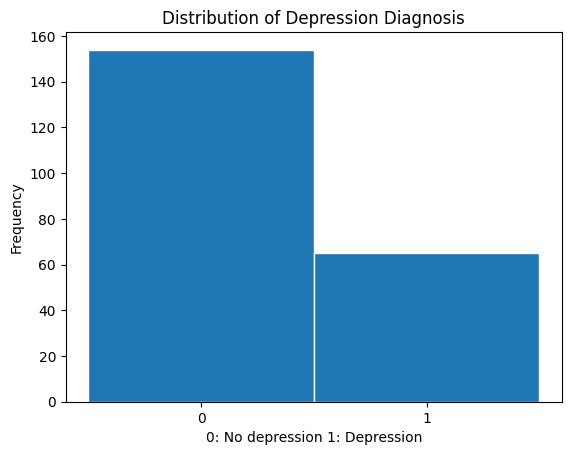

In [11]:
target_column = 'depression_label'

# Histogram for target class
plt.hist(df[target_column], bins=[-0.5, 0.5, 1.5], edgecolor='white')
plt.title('Distribution of Depression Diagnosis')
plt.xlabel('0: No depression 1: Depression')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Set x-ticks to show only 0 and 1
plt.show()

In [12]:
# Check for class imbalance
print(df[target_column].value_counts())

depression_label
0    154
1     65
Name: count, dtype: int64


### Stratified train-test partitioning
- generate X_train, X_test, y_train, y_test maintaining 20% in the test set
- additionally generate X_train_norm, X_test_norm for KNN and SVM classifier

*Explanation* of stratified train-test partitioning and its advantages:
- Stratified train-test partitioning involves splitting the dataset into train and test sets while maintaining the proportion of classes in each subset similar to that in the original dataset. 
- This is beneficial for datasets with unequal distribution ensuring both sets represent the class distribution accurately and improving model training and evaluation on minority classes.

### Model training

In [13]:
df.head()

,ID,depression_label,frequency_of_speech,mean_length_of_speech,mean_word_length,flair_sentiment,flair_score,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,300,0,77,4.181818,4.068323,0,0.898453,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,301,0,72,19.430556,3.961401,1,0.830033,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,302,0,99,6.151515,4.096880,1,0.613937,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,303,0,94,20.382979,3.914927,1,0.989942,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,304,0,80,12.400000,4.021169,0,0.990270,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611


In [14]:
df_modified_2=df.drop(columns=["frequency_of_speech", "flair_score", "mean_length_of_speech"])
df_modified_2.head()

,ID,depression_label,mean_word_length,flair_sentiment,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,300,0,4.068323,0,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,301,0,3.961401,1,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,302,0,4.096880,1,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,303,0,3.914927,1,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,304,0,4.021169,0,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611


In [15]:
X_array_2= df_modified_2.drop([target_column, "ID"], axis = 1).values
y_array_2 = df_modified_2[target_column].values
ids = df_modified_2['ID'].values

In [16]:
from sklearn.model_selection import train_test_split

# Perform stratified train-test split with a 20% test size
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X_array_2, 
                                                    y_array_2, 
                                                    ids,
                                                    test_size=0.2, 
                                                    stratify=y_array_2, 
                                                    random_state=RANDOM_SEED)

In [17]:
# Normalize the data for KNN and SVM

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Only the data with features is normalized, the class labels do not need normalization
X_array_2_normalized = scaler.fit_transform(X_array_2)

# Create splits from the normalized dataset.
X_train_norm, X_test_norm, y_train, y_test, ids_train, ids_test = train_test_split(X_array_2_normalized,
                                                              y_array_2,
                                                              ids,
                                                              test_size=0.2,
                                                              stratify=y_array_2, 
                                                              random_state=RANDOM_SEED)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [19]:
models_2 = {
    "DT_1": DecisionTreeClassifier(max_depth=3),
    "DT_2": DecisionTreeClassifier(max_depth=5),
    "RF_1": RandomForestClassifier(n_estimators=10, max_depth=3),
    "RF_2": RandomForestClassifier(n_estimators=100, max_depth=5),
    "KNN_1": KNeighborsClassifier(n_neighbors=3),
    "KNN_2": KNeighborsClassifier(n_neighbors=7),
    "SVM_1": SVC(kernel='rbf'),
    "SVM_2": SVC(kernel='linear'),
    "SVM_3": SVC(kernel='sigmoid'),
    "SVM_4": SVC(kernel='linear', class_weight= {0:2, 1:1}),
    "LR_1": LogisticRegression(),
    "LR_2": LogisticRegression(class_weight= "balanced"),
    "LR_3": LogisticRegression(class_weight= {0:2, 1:1})
}

# Iterate over the dictionary as follows:
for name, classifier in models_2.items():
    print("The name of the classifier is:", name, " and it is a sklearn object:", classifier)

The name of the classifier is: DT_1  and it is a sklearn object: DecisionTreeClassifier(max_depth=3)
The name of the classifier is: DT_2  and it is a sklearn object: DecisionTreeClassifier(max_depth=5)
The name of the classifier is: RF_1  and it is a sklearn object: RandomForestClassifier(max_depth=3, n_estimators=10)
The name of the classifier is: RF_2  and it is a sklearn object: RandomForestClassifier(max_depth=5)
The name of the classifier is: KNN_1  and it is a sklearn object: KNeighborsClassifier(n_neighbors=3)
The name of the classifier is: KNN_2  and it is a sklearn object: KNeighborsClassifier(n_neighbors=7)
The name of the classifier is: SVM_1  and it is a sklearn object: SVC()
The name of the classifier is: SVM_2  and it is a sklearn object: SVC(kernel='linear')
The name of the classifier is: SVM_3  and it is a sklearn object: SVC(kernel='sigmoid')
The name of the classifier is: SVM_4  and it is a sklearn object: SVC(class_weight={0: 2, 1: 1}, kernel='linear')
The name of th

In [20]:
# Individual performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Pandas dataframe to store results of each variable on the 10 classifiers
results_2 = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })

In [21]:
# Apply the classifier in each dataset
for name, classifier in models_2.items():

    # Start measuring the training time
    t_start = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier.fit(X_train_norm,y_train)
    # Stop measuring training time
    t_end = time.time()
    # Calculate Variable of interest `training_time`
    training_time = t_end - t_start
    #######

    # Start measuring the prediction time
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(X_test_norm)
    # Stop measuring prediction time
    t_end = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time = t_end - t_start
    #######


    # Get performance metrics
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted, zero_division=0)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
    #######


    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append to the main dataframe with the results
    results_2 = pd.concat([results_2, this_result], axis=0, ignore_index=True)

results_2

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT_1,0.004033,0.008598,0.545455,0.181818,0.153846,0.166667
1,DT_2,0.000000,0.000000,0.590909,0.142857,0.076923,0.100000
2,RF_1,0.018927,0.000000,0.659091,0.000000,0.000000,0.000000
3,RF_2,0.184213,0.005016,0.681818,0.000000,0.000000,0.000000
4,KNN_1,0.000000,0.008023,0.727273,0.600000,0.230769,0.333333
5,KNN_2,0.000000,0.006568,0.681818,0.333333,0.076923,0.125000
6,SVM_1,0.000000,0.005572,0.704545,0.000000,0.000000,0.000000
7,SVM_2,0.004479,0.000000,0.704545,0.000000,0.000000,0.000000
8,SVM_3,0.000000,0.000000,0.704545,0.000000,0.000000,0.000000
9,SVM_4,0.000000,0.000000,0.704545,0.000000,0.000000,0.000000


In [22]:
model = models_2['LR_2']

A logistic regression model predicts the probability of a binary outcome (e.g., 0 or 1) based on a linear combination of the input features. The model is usually represented as:
p(y=1∣X)=σ(β0+β1x1+β2x2+...+βnxn)

Where:
𝑝(𝑦=1∣𝑋) is the probability of the positive class (class 1) for a given input X=[x1,x2,...,xn].

σ(z)= 1/1+ (e raised to -z) is the sigmoid function that maps the linear combination to a probability between 0 and 1.

β0 ,β1 ,...,βn are the model coefficients (weights).

β0 is the intercept

x1 ,x2 ,...,xn are the feature values for the input.

Explain the Log-Odds for a Single Input  

For a single input vector 
X=[x1 ,x2 ,...,xn],
​the model computes the log-odds (logit), which is the linear combination of the input features and their corresponding weights:
𝑧=𝛽0+𝛽1𝑥1+𝛽2𝑥2+...+𝛽𝑛𝑥𝑛
​
The log-odds 𝑧 is then passed through the sigmoid function to produce a probability:
p(y=1∣X)= 1/1+ (e raised to -z)
 
To explain the model's prediction for a particular input, focus on how each feature 𝑥𝑖 and its corresponding coefficient 𝛽𝑖 contribute to the log-odds 𝑧.

Calculate the Contribution of Each Feature  

To understand how each feature contributes to the prediction, you can calculate the change in the log-odds for a given feature:
Δzi = βi * xi
This tells you how much the feature 𝑥𝑖 contributes to the overall log-odds. Larger values of 𝛽𝑖 (in absolute terms) have a greater influence on the model's decision.

Positive 𝛽𝑖: A positive coefficient increases the log-odds of the positive class, making it more likely that the model will predict a 1 (positive class).
Negative 𝛽𝑖: A negative coefficient decreases the log-odds, making it more likely that the model will predict a 0 (negative class).

Visualize the Impact of Features  

To make the explanation more accessible, you can visualize the log-odds contribution of each feature:

For each feature, calculate the contribution to the log-odds using 
Δ𝑧𝑖=𝛽𝑖 * 𝑥𝑖  

Sum the contributions to get the total log-odds:
z total = summation of Δzi
 
Calculate the probability from the log-odds:
p(y=1∣X)= 1/1+ (e raised to -ztotal)
 
By showing how each feature moves the log-odds, you provide transparency on how each feature affects the model's decision.

Intercept: [-0.62923885]
Coefficients: [[ 0.37239477 -0.4711514  -0.57314437  0.63125736 -0.74020695  0.76969651
   0.20918236  0.46535072  0.22825777  0.328086  ]]


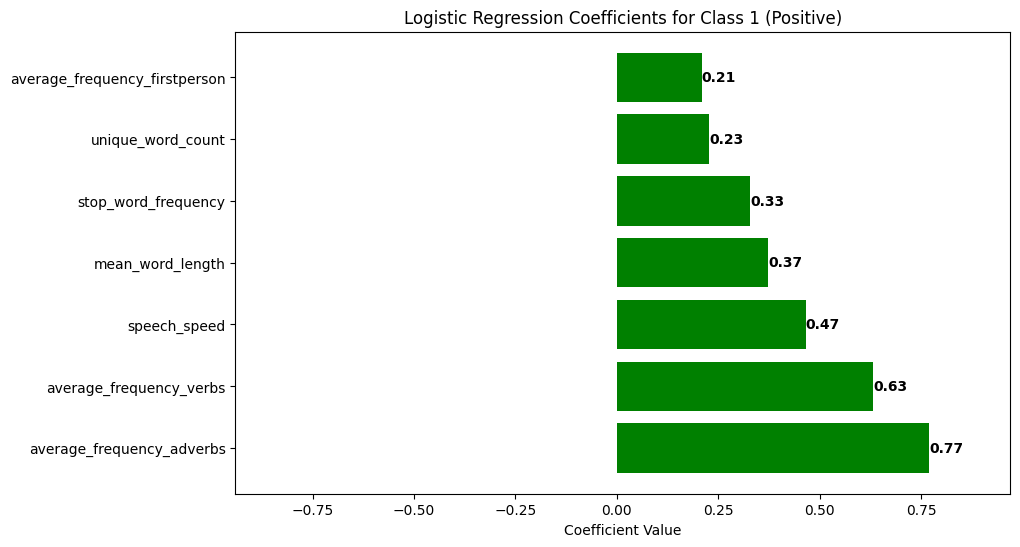

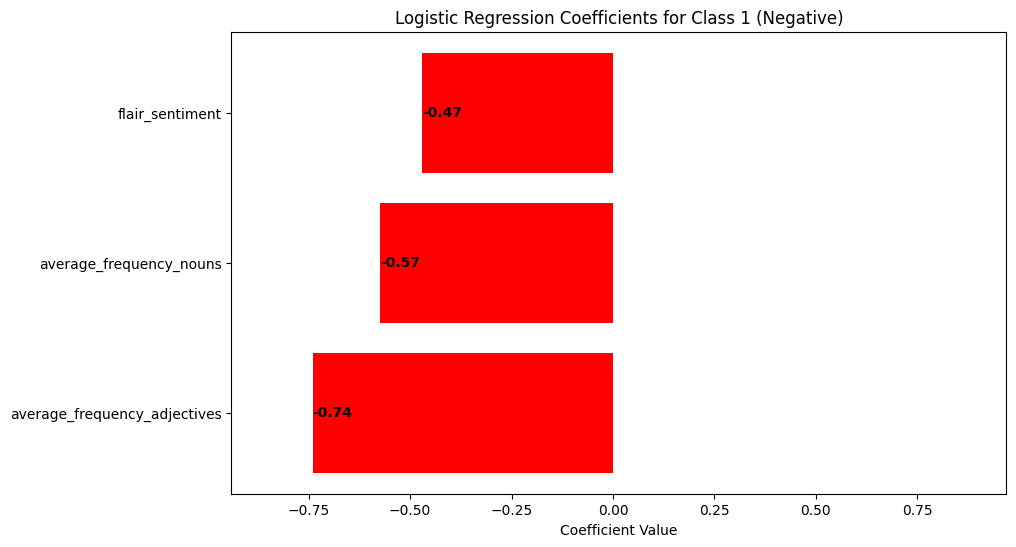

In [31]:
import numpy as np
import matplotlib.pyplot as plt

model.fit(X_train_norm, y_train)

# Get coefficients: class 1
coefficients_class_1 = model.coef_[0]
features = ["mean_word_length", "flair_sentiment",	"average_frequency_nouns",	"average_frequency_verbs",	"average_frequency_adjectives",	"average_frequency_adverbs",	"average_frequency_firstperson",	"speech_speed",	"unique_word_count",	"stop_word_frequency"]

print(f'Intercept: {model.intercept_}') # log odds of positive class when all features are set to zero, This means that with no information from the features (i.e., when all feature values are zero), the model predicts a probability of this value for the positive class
print(f'Coefficients: {model.coef_}')

#the model is predicting that class 1 is less likely than class 0 when there is no information

# Separate positive and negative coefficients
positive_coefficients = [(feature, coef) for feature, coef in zip(features, coefficients_class_1) if coef > 0]
negative_coefficients = [(feature, coef) for feature, coef in zip(features, coefficients_class_1) if coef < 0]

# Sort the positive and negative coefficients by coefficient value in descending order
positive_coefficients.sort(key=lambda x: x[1], reverse=True)
negative_coefficients.sort(key=lambda x: x[1])

# Unzip the sorted positive and negative coefficients for plotting
positive_features, positive_values = zip(*positive_coefficients)
negative_features, negative_values = zip(*negative_coefficients)

# Calculate the x-axis range to make both plots consistent
x_min = min(min(positive_values), min(negative_values))
x_max = max(max(positive_values), max(negative_values))

# Plot positive coefficients (highest to lowest)
plt.figure(figsize=(10, 6))
bars = plt.barh(positive_features, positive_values, color='green')
plt.xlim(x_min - 0.2, x_max + 0.2)  # Set x-axis range to be consistent
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients for Class 1 (Positive)')

# Add coefficient values to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
             va='center', ha='left', color='black', fontweight='bold')

plt.show()

# Plot negative coefficients
plt.figure(figsize=(10, 6))
bars = plt.barh(negative_features, negative_values, color='red', linewidth=0.5)
plt.xlim(x_min - 0.2, x_max + 0.2)  # Set x-axis range to be consistent
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients for Class 1 (Negative)')

# Add coefficient values to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
             va='center', ha='left', color='black', fontweight='bold')

plt.show()

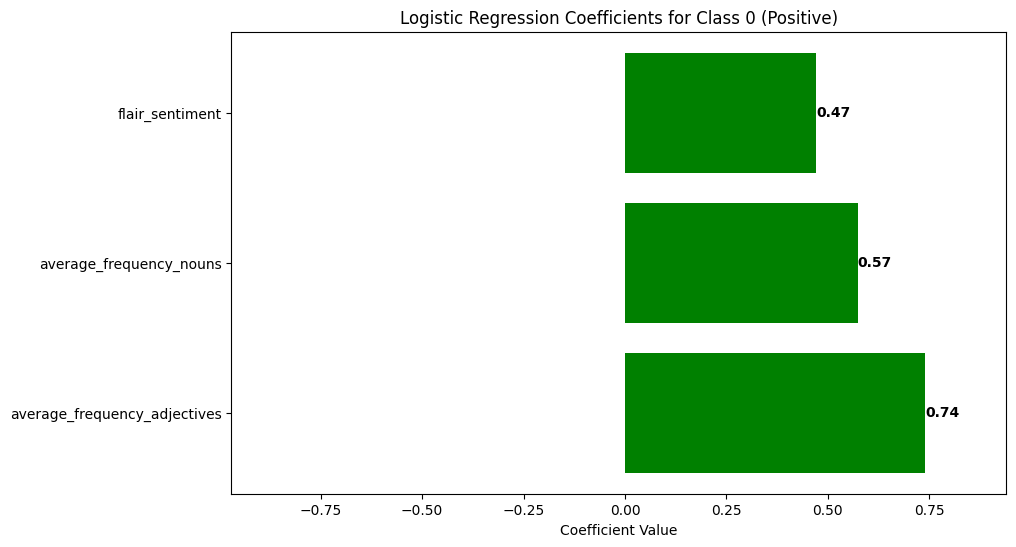

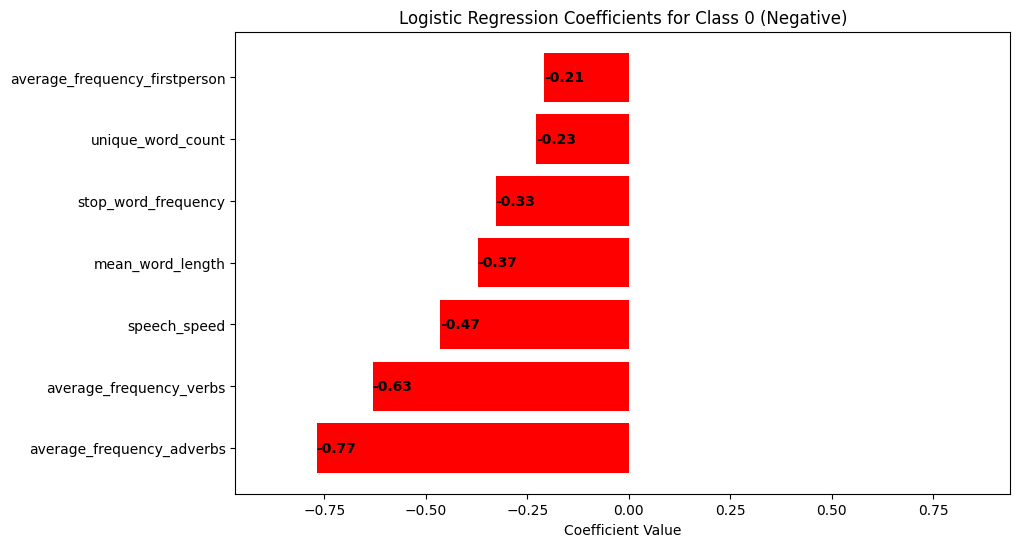

In [40]:
model.fit(X_train_norm, y_train)

# Get coefficients for class 0 (negative class)
coefficients_class_0 = -coefficients_class_1

# Features
features = ["mean_word_length", "flair_sentiment", "average_frequency_nouns", 
            "average_frequency_verbs", "average_frequency_adjectives", 
            "average_frequency_adverbs", "average_frequency_firstperson", 
            "speech_speed", "unique_word_count", "stop_word_frequency"]

## Separate features with positive and negative coefficients
positive_coefficients = [(feature, coef) for feature, coef in zip(features, coefficients_class_0) if coef > 0]
negative_coefficients = [(feature, coef) for feature, coef in zip(features, coefficients_class_0) if coef < 0]

# Sort the features by coefficient value in descending order
positive_coefficients.sort(key=lambda x: x[1], reverse=True)
negative_coefficients.sort(key=lambda x: x[1])

# Unzip the sorted positive and negative coefficients
positive_features, positive_values = zip(*positive_coefficients)
negative_features, negative_values = zip(*negative_coefficients)

# Calculate x-axis range for both plots (to make them consistent)
x_min = min(min(positive_values), min(negative_values))
x_max = max(max(positive_values), max(negative_values))

# Plot positive coefficients (highest to lowest)
plt.figure(figsize=(10, 6))
bars = plt.barh(positive_features, positive_values, color='green')
plt.xlim(x_min - 0.2, x_max + 0.2)  # Set x-axis range to be consistent
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients for Class 0 (Positive)')

# Add coefficient values to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
             va='center', ha='left', color='black', fontweight='bold')

plt.show()

# Plot negative coefficients
plt.figure(figsize=(10, 6))
bars = plt.barh(negative_features, negative_values, color='red', linewidth=0.5)
plt.xlim(x_min - 0.2, x_max + 0.2)  # Set x-axis range to be consistent
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients for Class 0 (Negative)')

# Add coefficient values to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
             va='center', ha='left', color='black', fontweight='bold')

plt.show()

Intercept: [-0.62923885]
Coefficients: [[ 0.37239477 -0.4711514  -0.57314437  0.63125736 -0.74020695  0.76969651
   0.20918236  0.46535072  0.22825777  0.328086  ]]
Odds Ratios: [1.45120576 0.62428305 0.56375001 1.87997289 0.47701519 2.15911088
 1.23266977 1.59257263 1.25640915 1.38830836]


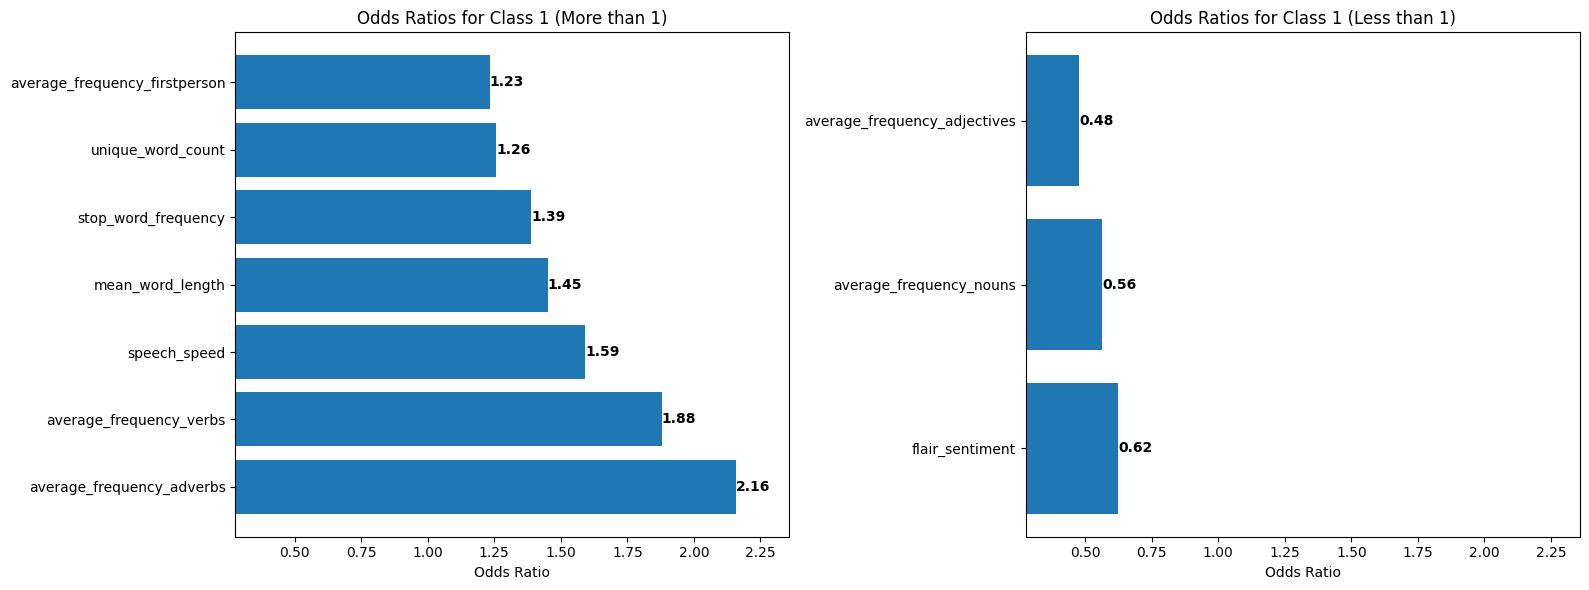

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Get coefficients for class 1
coefficients_class_1 = model.coef_[0]

# Exponentiate the coefficients to get the odds ratios
odds_ratios_class_1 = np.exp(coefficients_class_1)

# Define the feature names
features = [
    "mean_word_length", "flair_sentiment", "average_frequency_nouns",
    "average_frequency_verbs", "average_frequency_adjectives", 
    "average_frequency_adverbs", "average_frequency_firstperson", 
    "speech_speed", "unique_word_count", "stop_word_frequency"
]

# Print the intercept and coefficients for review
print(f'Intercept: {model.intercept_}')  # Log-odds of the positive class when all features are set to zero
print(f'Coefficients: {model.coef_}')
print(f'Odds Ratios: {odds_ratios_class_1}')

# Separate positive and negative odds ratios
positive_odds_ratios = [(feature, odds) for feature, odds in zip(features, odds_ratios_class_1) if odds > 1]
negative_odds_ratios = [(feature, odds) for feature, odds in zip(features, odds_ratios_class_1) if odds < 1]

# Sort the positive and negative odds ratios
positive_odds_ratios.sort(key=lambda x: x[1], reverse=True)
negative_odds_ratios.sort(key=lambda x: x[1], reverse= True)

# Unzip the sorted positive and negative odds ratios for plotting
positive_features, positive_odds = zip(*positive_odds_ratios)
negative_features, negative_odds = zip(*negative_odds_ratios)

# Calculate the x-axis range to make both plots consistent
x_min = min(min(positive_odds), min(negative_odds))
x_max = max(max(positive_odds), max(negative_odds))

# Create the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot positive odds ratios (highest to lowest)
axes[0].barh(positive_features, positive_odds, color='green')
axes[0].set_xlim(x_min - 0.2, x_max + 0.2)
axes[0].set_xlabel('Odds Ratio')
axes[0].set_title('Odds Ratios for Class 1 (More than 1)')

# Add odds ratio values to each bar
for bar in axes[0].barh(positive_features, positive_odds):
    axes[0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left', color='black', fontweight='bold')

# Plot negative odds ratios (lowest to highest)
axes[1].barh(negative_features, negative_odds, color='red', linewidth=0.5)
axes[1].set_xlim(x_min - 0.2, x_max + 0.2)
axes[1].set_xlabel('Odds Ratio')
axes[1].set_title('Odds Ratios for Class 1 (Less than 1)')

# Add odds ratio values to each bar
for bar in axes[1].barh(negative_features, negative_odds):
    axes[1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left', color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

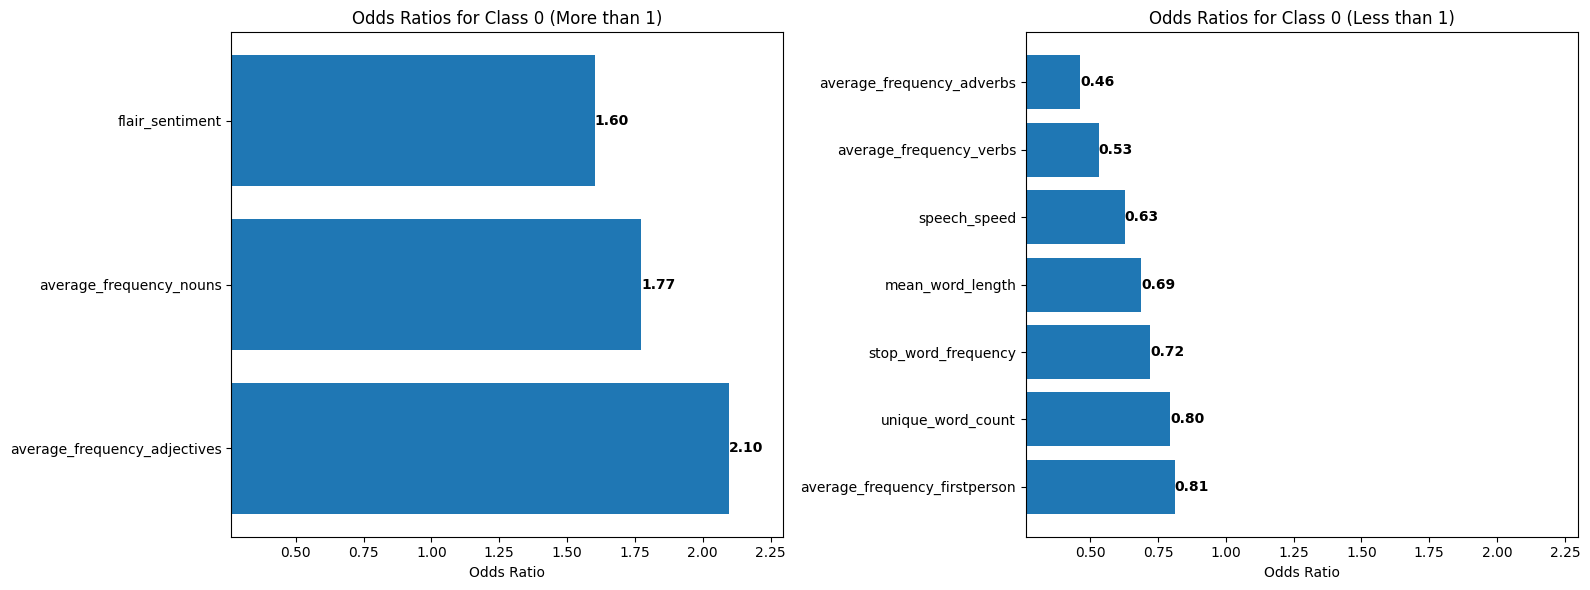

In [42]:
# Get coefficients for class 0
coefficients_class_0 = -coefficients_class_1

# Exponentiate the coefficients to get the odds ratios
odds_ratios_class_0 = np.exp(coefficients_class_0)

# Define the feature names
features = [
    "mean_word_length", "flair_sentiment", "average_frequency_nouns",
    "average_frequency_verbs", "average_frequency_adjectives", 
    "average_frequency_adverbs", "average_frequency_firstperson", 
    "speech_speed", "unique_word_count", "stop_word_frequency"
]

# Separate positive and negative odds ratios for class 0
positive_odds_ratios = [(feature, odds) for feature, odds in zip(features, odds_ratios_class_0) if odds > 1]
negative_odds_ratios = [(feature, odds) for feature, odds in zip(features, odds_ratios_class_0) if odds < 1]

# Sort the positive and negative odds ratios for class 0
positive_odds_ratios.sort(key=lambda x: x[1], reverse=True)
negative_odds_ratios.sort(key=lambda x: x[1], reverse=True)

# Unzip the sorted positive and negative odds ratios for plotting
positive_features, positive_odds = zip(*positive_odds_ratios)
negative_features, negative_odds = zip(*negative_odds_ratios)

# Calculate the x-axis range to make both plots consistent
x_min = min(min(positive_odds), min(negative_odds))
x_max = max(max(positive_odds), max(negative_odds))

# Create the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot positive odds ratios for class 0 (highest to lowest)
axes[0].barh(positive_features, positive_odds, color='green')
axes[0].set_xlim(x_min - 0.2, x_max + 0.2)
axes[0].set_xlabel('Odds Ratio')
axes[0].set_title('Odds Ratios for Class 0 (More than 1)')

# Add odds ratio values to each bar for class 0
for bar in axes[0].barh(positive_features, positive_odds):
    axes[0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left', color='black', fontweight='bold')

# Plot negative odds ratios for class 0 (lowest to highest)
axes[1].barh(negative_features, negative_odds, color='red', linewidth=0.5)
axes[1].set_xlim(x_min - 0.2, x_max + 0.2)
axes[1].set_xlabel('Odds Ratio')
axes[1].set_title('Odds Ratios for Class 0 (Less than 1)')

# Add odds ratio values to each bar for class 0
for bar in axes[1].barh(negative_features, negative_odds):
    axes[1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left', color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
import sklearn
print(sklearn.__version__)

1.5.2


In [34]:
idx = np.where(ids_test== 471)[0]
idx
np.sort(ids_test)

array([303, 318, 329, 330, 334, 339, 341, 343, 345, 348, 359, 369, 372,
       382, 385, 388, 391, 392, 399, 405, 406, 408, 414, 418, 420, 423,
       429, 433, 441, 442, 443, 457, 458, 470, 471, 472, 474, 476, 488,
       492, 628, 641, 670, 692])

In [44]:
# Take a single test sample
single_input = X_test_norm[idx]
print(f'Input features: {single_input}')

# Calculate log-odds (z) and probability
z = model.intercept_ + np.dot(single_input, model.coef_.T)
probability = 1 / (1 + np.exp(-z))

# Print the log-odds and probability
print(f'Log-odds (z): {z}')
print(f'Predicted probability (p): {probability}')

# Calculate contributions of each feature
contributions = model.coef_[0] * single_input
print(f'Contributions from each feature: {contributions}')

# Sum of contributions
total_contribution = np.sum(contributions) + model.intercept_
print(f'Total contribution to log-odds: {total_contribution}')

Input features: [[0.67599615 1.         0.47230169 0.40391336 0.32684724 0.13160556
  0.58576671 0.14060915 0.4813278  0.26268888]]
Log-odds (z): [[-0.62099887]]
Predicted probability (p): [[0.34955431]]
Contributions from each feature: [[ 0.25173743 -0.4711514  -0.27069705  0.25497328 -0.2419346   0.10129634
   0.12253206  0.06543257  0.10986681  0.08618454]]
Total contribution to log-odds: [-0.62099887]


In [45]:
idx = np.where(ids_test== 641)[0]
idx
np.sort(ids_test)

array([303, 318, 329, 330, 334, 339, 341, 343, 345, 348, 359, 369, 372,
       382, 385, 388, 391, 392, 399, 405, 406, 408, 414, 418, 420, 423,
       429, 433, 441, 442, 443, 457, 458, 470, 471, 472, 474, 476, 488,
       492, 628, 641, 670, 692])

In [46]:
# Take a single test sample
single_input = X_test_norm[idx]
print(f'Input features: {single_input}')

# Calculate log-odds (z) and probability
z = model.intercept_ + np.dot(single_input, model.coef_.T)
probability = 1 / (1 + np.exp(-z))

# Print the log-odds and probability
print(f'Log-odds (z): {z}')
print(f'Predicted probability (p): {probability}')

# Calculate contributions of each feature
contributions = model.coef_[0] * single_input
print(f'Contributions from each feature: {contributions}')

# Sum of contributions
total_contribution = np.sum(contributions) + model.intercept_
print(f'Total contribution to log-odds: {total_contribution}')

Input features: [[0.30547657 0.         0.35567231 0.63303753 0.59376624 0.37620556
  0.83382491 0.73429928 0.11065007 0.05734212]]
Log-odds (z): [[0.0905293]]
Predicted probability (p): [[0.52261688]]
Contributions from each feature: [[ 0.11375788 -0.         -0.20385158  0.3996096  -0.4395099   0.28956411
   0.17442146  0.3417067   0.02525674  0.01881315]]
Total contribution to log-odds: [0.0905293]
